<a href="https://colab.research.google.com/github/Daniel022de/Bootcamp_SoulCode_EngenhariaDados/blob/main/ETL/Atividade_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Atividade ETL Marketing Campaign

*Esse Notebook é sobre a extração, tratamento, limpeza e carregamento de um dataset disponível nesse* [Bucket Google Cloud](https://storage.googleapis.com/bucket-pratica-s3/marketing_campaign.csv%20-%20marketing_campaign.csv.csv) *visando a resolução de uma tarefa proposta pelo professor* **Igor Gondim** *no bootcamp* **engenharia de dados** *da SoulCode.* ***A proposta foi a seguinte:***

* O arquivo está em outra linguagem e deve ter seus dados traduzidos para Português-BR
* Realizar a extração corretamente para um dataframe
* Verificar a existência de dados inconsistentes e realizar a limpeza para NaN ou NA explicando o porque da decisão
* Realizar o drop(se necessário) de colunas do dataframe realizando o comentário do porque da exclusão 
* Todos os passos devem ser comentados



! ***Você pode encontrar esse notebook no meu repositório*** [GitHub](https://)

! ***Você pode entrar em contato comigo através do meu email*** ddololiveira.pessoal@gmail.com ***e*** [Linkedin](https://www.linkedin.com/in/daniel-oliveira-503b0323b/).

! ***Toda dúvida,recomendações e feedbacks serão bem-vindas.***



#Instalação

In [908]:
pip install pandera

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importando bibliotecas

* Pandas utilizada para: **extração e tratamento dos dados** 
* Pandera utilizada para: **validação e limpeza dos dados**
* NumPy utilizada para: **Tratar valores nulos**

In [909]:
import pandas as pd
import pandera as pa
import numpy as np

##Set_option

* Definindo o número máximo de colunas apresentadas pelo DataFrame

In [910]:
pd.set_option('Display.max_columns',100)

#Extração

In [911]:
url = 'https://storage.googleapis.com/bucket-pratica-s3/marketing_campaign.csv%20-%20marketing_campaign.csv.csv'
df = pd.read_csv(url,parse_dates=['Dt_Customer'],dayfirst=True)

#Pré-análise do DataFrame

In [912]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


## Avaliando informações das colunas





* Fonte de pesquisa: [informações](https://towardsdatascience.com/data-science-project-marketing-analytics-data-driven-solutions-72d050084642)



1. Os dados é sobre campanhas de marketing feitas a clientes no EUA;
2. Colunas:

* **ID**: Identificador exclusivo do cliente
* **Year_Birth**: Ano de nascimento do cliente
* **Education**: nível de educação do cliente
* **Marital_Status**: estado civil do cliente
* **Income**: renda familiar anual do cliente
* **Kidhome**: número de crianças na casa do cliente
* **Tenhome**: número de adolescentes na casa do cliente
* **Dt_Customer**: Data de cadastro do cliente na empresa
* **Recency**: número de dias desde a última compra do cliente
* **MntWines**: Valor gasto em vinho nos últimos 2 anos
* **MntFruits**: Valor gasto com frutas nos últimos 2 anos
* **MntMeatProducts**: Valor gasto com carne nos últimos 2 anos
* **MntFishProducts**: Valor gasto com peixe nos últimos 2 anos
* **MntSweetProducts**: Valor gasto em doces nos últimos 2 anos
* **MntGoldProds**: Valor gasto em ouro nos últimos 2 anos
* **NumDealsPurchase**: Número de compras feitas com desconto
* **NumWebPurchase**: Número de compras realizadas através do site da empresa
* **NumCatalogPurchase**: Número de compras feitas usando um catálogo
* **NumStorePurchase**: Número de compras feitas diretamente nas lojas
* **NumWebVisitsMonth**: Número de visitas ao site da empresa no último mês
* **AcceptedCmp3**: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário
* **AcceptedCmp4**: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário
* **AcceptedCmp5**: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário
* **AcceptedCmp1**: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário
* **AcceptedCmp2**: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário
* **Response**: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário
* **Complain**: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário






## Análise exploratória para o tratamento

É possível indentificar transformações necessárias:
* Tradução colunas e dados;
* Kidhome e Tenhome podem ser unidos em uma única coluna

In [913]:
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [914]:
df.groupby(['Education'],dropna=False).size().sort_values(ascending=True)

Education
Basic           54
2n Cycle       203
Master         370
PhD            486
Graduation    1127
dtype: int64

#Tratamento

In [915]:
#Backup do df
df_backup = df.copy

##Tradução de colunas

In [916]:
#Renomeando

df.rename (
    columns = {
        'ID':'id',
        'Year_Birth':'ano_nasc',
        'Education':'educacao',
        'Marital_Status':'estado_civil',
        'Income':'renda',
        'Kidhome':'criancas',
        'Teenhome':'adolescentes',
        'Dt_Customer':'dt_cadastro',
        'Recency':'dias_ultima_compra',
        'MntWines':'gasto_vinho',
        'MntFruits':'gasto_fruta',
        'MntMeatProducts':'gasto_carne',
        'MntFishProducts':'gasto_peixe',
        'MntSweetProducts':'gasto_doce', 	
        'MntGoldProds':'gasto_ouro',
        'NumDealsPurchases':'compras_desconto',
        'NumWebPurchases':'compras_web',
        'NumCatalogPurchases':'compras_catalogo',	
        'NumStorePurchases':'compras_loja',
        'NumWebVisitsMonth':'visitacoes_web',
        'AcceptedCmp1':'res_campanha1',
        'AcceptedCmp2':'res_campanha2',
        'AcceptedCmp3':'res_campanha3',
        'AcceptedCmp4':'res_campanha4',
        'AcceptedCmp5':'res_campanha5',
        'Z_CostContact':'custo_contato',
        'Z_Revenue':'receita',
        'Response':'res_ult_campanha',
        'Complain':'reclamacao'

    },inplace=True
)

##Tradução coluna 'educacao'

In [917]:
df['educacao'].replace({
    'Basic':'Ensino Médio',
    '2n Cycle':'Graduação',
    'Master':'Mestrado',
    'Graduation':'Pré-Gradruação'},inplace=True)


## Tradução coluna 'estado_civil'

In [918]:
df['estado_civil'].replace(
    {'Absurd':'Assexual',
     'YOLO':'Liberal',
     'Alone':'Sozinho/a',
     'Widow':'Viúvo/a',
     'Divorced':'Divorciado',
     'Single':'Solteiro',
     'Together':'União estável',
     'Married':'Casado',},inplace=True)
     

## Unindo a coluna 'criancas' e 'adolescentes' em uma nova chamada 'dependentes'

* Observação: vou unir essas colunas, criar dependentes e depois excluir as colunas em um novo DataFrame pra preservar esses dados separados caso o analista/cientista de dados precise deles.

In [919]:
df['dependentes'] = df['criancas']+df['adolescentes']

#Limpeza 

## Exploração dos dados para levantamento de inconsistências

**inconsistências observadas:**


1.   Um id == 0 -> suspeito/sem diretriz
2.   Analisando os anos de cadastro de clientes,notei que esse sistema foi criado em 2012. Portanto as datas de nascimentos 1893,1899 e 1900
se tornam pouco prováveis de serem reais. Por isso vou considerá-las como um dado vazio
3. Coluna 'receita' e 'custo_contato' podem ser dropadas. 
Motivo: dados iguais e irrelevantes pra análise. 



In [920]:
# Exploração dos dados
df.groupby(['dependentes'],dropna=False).size().sort_values(ascending=True)

dependentes
3      53
2     421
0     638
1    1128
dtype: int64

In [921]:
# Filtro para análise do ano de criação do sistema de cadastro
filtrodt = df.dt_cadastro.dt.year 
df.loc[filtrodt].min()

id                                    500
ano_nasc                             1958
educacao                     Ensino Médio
estado_civil                       Casado
renda                             34445.0
criancas                                0
adolescentes                            0
dt_cadastro           2012-08-07 00:00:00
dias_ultima_compra                     31
gasto_vinho                           228
gasto_fruta                            43
gasto_carne                           122
gasto_peixe                            40
gasto_doce                             48
gasto_ouro                             21
compras_desconto                        1
compras_web                             2
compras_catalogo                        2
compras_loja                            8
visitacoes_web                          2
res_campanha3                           0
res_campanha4                           0
res_campanha5                           0
res_campanha1                     

## Filtro para analisar dados com poucas ocorrências

* analisar as poucas ocorrências de Assexual,Liberar e Sozinho/a


1.   Assexual Ok
2.   **Liberal duplicado -> Labels 2177 e 2202 -> Dropar o 2177**
3. Sozinho/a OK



In [922]:
#Assexual
filtro = df.estado_civil == 'Assexual'
df.loc[filtro]


,id,ano_nasc,educacao,estado_civil,renda,criancas,adolescentes,dt_cadastro,dias_ultima_compra,gasto_vinho,gasto_fruta,gasto_carne,gasto_peixe,gasto_doce,gasto_ouro,compras_desconto,compras_web,compras_catalogo,compras_loja,visitacoes_web,res_campanha3,res_campanha4,res_campanha5,res_campanha1,res_campanha2,reclamacao,custo_contato,receita,res_ult_campanha,dependentes
2093,7734,1993,Pré-Gradruação,Assexual,79244.0,0,0,2012-12-19,58,471,102,125,212,61,245,1,4,10,7,1,0,0,1,1,0,0,3,11,1,0
2134,4369,1957,Mestrado,Assexual,65487.0,0,0,2014-01-10,48,240,67,500,199,0,163,3,3,5,6,2,0,0,0,0,0,0,3,11,0,0


In [923]:
#Liberal
filtro = df.estado_civil == 'Liberal'
df.loc[filtro]

,id,ano_nasc,educacao,estado_civil,renda,criancas,adolescentes,dt_cadastro,dias_ultima_compra,gasto_vinho,gasto_fruta,gasto_carne,gasto_peixe,gasto_doce,gasto_ouro,compras_desconto,compras_web,compras_catalogo,compras_loja,visitacoes_web,res_campanha3,res_campanha4,res_campanha5,res_campanha1,res_campanha2,reclamacao,custo_contato,receita,res_ult_campanha,dependentes
2177,492,1973,PhD,Liberal,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,0,1
2202,11133,1973,PhD,Liberal,48432.0,0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1,1


In [924]:
#Sozinho/a
filtro = df.estado_civil == 'Sozinho/a'
df.loc[filtro]

,id,ano_nasc,educacao,estado_civil,renda,criancas,adolescentes,dt_cadastro,dias_ultima_compra,gasto_vinho,gasto_fruta,gasto_carne,gasto_peixe,gasto_doce,gasto_ouro,compras_desconto,compras_web,compras_catalogo,compras_loja,visitacoes_web,res_campanha3,res_campanha4,res_campanha5,res_campanha1,res_campanha2,reclamacao,custo_contato,receita,res_ult_campanha,dependentes
131,433,1958,Mestrado,Sozinho/a,61331.0,1,1,2013-03-10,42,534,5,47,0,5,41,5,11,1,6,8,0,0,0,0,0,0,3,11,0,2
138,7660,1973,PhD,Sozinho/a,35860.0,1,1,2014-05-19,37,15,0,8,4,2,20,2,1,1,2,5,1,0,0,0,0,0,3,11,1,2
153,92,1988,Pré-Gradruação,Sozinho/a,34176.0,1,0,2014-05-12,12,5,7,24,19,14,20,4,3,0,4,6,0,0,0,0,0,0,3,11,0,1


## ano_nascimento

* Decidir passar os anos inconsistentes para vazio.

In [925]:
df.ano_nasc.replace([1893,1899,1900],np.NaN,inplace=True)

## Tratamento ano_nasc

In [926]:
df['ano_nasc'] = df['ano_nasc'].astype('Int64')

## Dropagem colunas 'receita' e 'custo_contato'

In [927]:
df.drop(['receita','custo_contato'],axis=1,inplace=True)

## Dropar Label 

In [928]:
# 2177 e 2202 duplicadas. Dropar o 2177, menos recente
df.drop([2177],axis=0,inplace=True)

## Organização DataFrame

* Sem a coluna 'criancas' e 'adolescentes'

In [929]:
dfv1 = df[['id','ano_nasc','educacao','estado_civil','renda','dependentes','dt_cadastro','dias_ultima_compra','gasto_vinho','gasto_fruta','gasto_carne','gasto_peixe','gasto_doce','gasto_ouro','compras_desconto','compras_web','compras_catalogo','compras_loja','visitacoes_web','res_campanha1','res_campanha2','res_campanha3','res_campanha4','res_campanha5','res_ult_campanha','reclamacao']]

In [930]:
dfv1.head(1)

,id,ano_nasc,educacao,estado_civil,renda,dependentes,dt_cadastro,dias_ultima_compra,gasto_vinho,gasto_fruta,gasto_carne,gasto_peixe,gasto_doce,gasto_ouro,compras_desconto,compras_web,compras_catalogo,compras_loja,visitacoes_web,res_campanha1,res_campanha2,res_campanha3,res_campanha4,res_campanha5,res_ult_campanha,reclamacao
0,5524,1957,Pré-Gradruação,Solteiro,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0


#Validação

In [931]:
schema = pa.DataFrameSchema(
    columns = {
        'id':pa.Column(pa.Int),
        'ano_nasc':pa.Column(pa.Int,nullable=True),
        'educacao':pa.Column(pa.String),
        'estado_civil':pa.Column(pa.String),
        'renda':pa.Column(pa.Float,nullable=True),
        'dependentes':pa.Column(pa.Int),
        'dt_cadastro':pa.Column(pa.DateTime),
        'dias_ultima_compra':pa.Column(pa.Int),
        'gasto_vinho':pa.Column(pa.Int),
        'gasto_fruta':pa.Column(pa.Int),
        'gasto_carne':pa.Column(pa.Int),
        'gasto_peixe':pa.Column(pa.Int),
        'gasto_doce':pa.Column(pa.Int),
        'gasto_ouro':pa.Column(pa.Int),
        'compras_desconto':pa.Column(pa.Int),
        'compras_web':pa.Column(pa.Int),
        'compras_catalogo':pa.Column(pa.Int),
        'compras_loja':pa.Column(pa.Int),
        'visitacoes_web':pa.Column(pa.Int),
        'res_campanha1':pa.Column(pa.Int),
        'res_campanha2':pa.Column(pa.Int),
        'res_campanha3':pa.Column(pa.Int),
        'res_campanha4':pa.Column(pa.Int),
        'res_campanha5':pa.Column(pa.Int),
        'res_ult_campanha':pa.Column(pa.Int),               
        'reclamacao':pa.Column(pa.Int)                     


    }
)

In [932]:
schema.validate(dfv1)

,id,ano_nasc,educacao,estado_civil,renda,dependentes,dt_cadastro,dias_ultima_compra,gasto_vinho,gasto_fruta,gasto_carne,gasto_peixe,gasto_doce,gasto_ouro,compras_desconto,compras_web,compras_catalogo,compras_loja,visitacoes_web,res_campanha1,res_campanha2,res_campanha3,res_campanha4,res_campanha5,res_ult_campanha,reclamacao
0,5524,1957,Pré-Gradruação,Solteiro,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,1,0
1,2174,1954,Pré-Gradruação,Solteiro,46344.0,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Pré-Gradruação,União estável,71613.0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Pré-Gradruação,União estável,26646.0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Casado,58293.0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Pré-Gradruação,Casado,61223.0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,União estável,64014.0,3,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,1,0,0,0,0,0,0
2237,7270,1981,Pré-Gradruação,Divorciado,56981.0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,0,0,1,0,0,0
2238,8235,1956,Mestrado,União estável,69245.0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


# Setar index

In [933]:
dfv1.set_index('id',inplace=True)

#Load

In [934]:
dfv1.to_csv('clientes.csv')

#Análise geral

In [935]:
# Quais são os três produtos mais comprado pelos solteiros 

filtrosolt = dfv1.estado_civil == 'Solteiro'
dfsolteiro = dfv1.loc[filtrosolt]


In [936]:
dfsolteiro[['estado_civil','gasto_vinho','gasto_fruta','gasto_carne','gasto_peixe','gasto_doce','gasto_ouro']]

,estado_civil,gasto_vinho,gasto_fruta,gasto_carne,gasto_peixe,gasto_doce,gasto_ouro
id,,,,,,,
5524,Solteiro,635,88,546,172,88,88
2174,Solteiro,11,1,6,2,1,6
2114,Solteiro,1006,22,115,59,68,45
2278,Solteiro,4,17,19,30,24,39
7892,Solteiro,6,4,25,15,12,13
...,...,...,...,...,...,...,...
4286,Solteiro,580,6,58,8,0,27
4201,Solteiro,229,7,137,4,0,91
7004,Solteiro,24,3,26,7,1,23


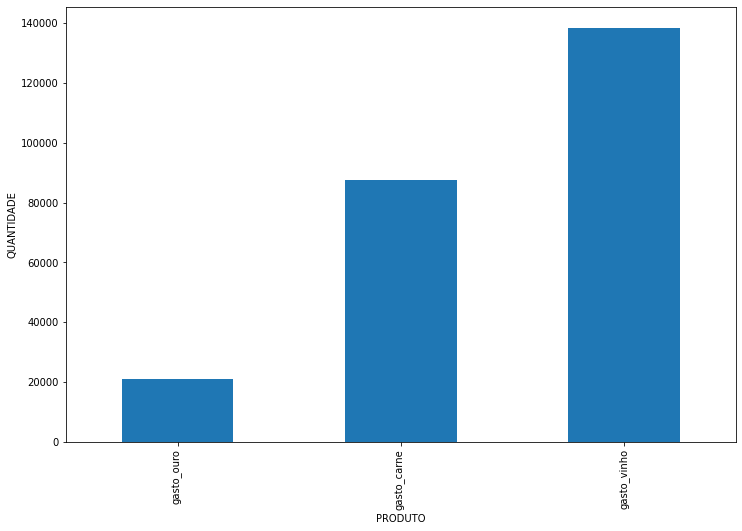

In [937]:
dfsolteiro[['gasto_vinho','gasto_fruta','gasto_carne','gasto_peixe','gasto_doce','gasto_ouro']].sum().sort_values(ascending=True).tail(3).plot.bar(figsize=(12,8),xlabel='PRODUTO',ylabel='QUANTIDADE')